In [225]:
import json # we need to use the JSON package to load the data, since the data is stored in JSON format
import numpy as np
import matplotlib.pyplot as plt

In [226]:
with open("proj1_data.json") as fp:
    data = json.load(fp)

In [227]:
# Lowers every word's text, and split
for data_point in data:
    data_point["text"] = data_point["text"].lower().split()

In [228]:
# Sets Traning, Validation, Test sets
training_set = data[:10000]
validation_set = data[10000:11000]
test_set = data[11000:]

In [229]:
# Finds words recurring number
words_recurrence = {}
for data_point in training_set:
    for word in data_point["text"]:
        if word in words_recurrence:
            words_recurrence[word] += 1
        else:
            words_recurrence[word] = 1

In [230]:
# Sorts from high to low amd trim to size 160 
words_recurrence = sorted(words_recurrence.items(), key=lambda kv: kv[1], reverse=True)
del words_recurrence[160:]

In [231]:
# The 160 most frequently occurring words (from 0 to 159)
# Builds vector w
w = {}
i = 0
for word in words_recurrence:
    w[word[0]] = i
    i += 1

In [232]:
# Builds matrix x
x = np.zeros((12000, 160))
i = 0
for data_point in data:
    for word in data_point["text"]:
        if word in w:
            x[i, w[word]] += 1
    i += 1

In [233]:
# Splits y into Traning, Validation, Test vectors
x_training = x[:10000]
x_validation = x[10000:11000]
x_test = x[11000:]

In [234]:
# Builds vector y
y = np.zeros(12000)
i = 0
for data_point in data:
    y[i] = data_point["popularity_score"]
    i += 1

In [235]:
# Splits y into Traning, Validation, Test vectors
y_training = y[:10000]
y_validation = y[10000:11000]
y_test = y[11000:]

In [236]:
# Closed-form solution
weight_closed = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x_training), x_training)), np.transpose(x_training)), y_training)
estimation_closed = np.dot(x_validation, weight_closed)

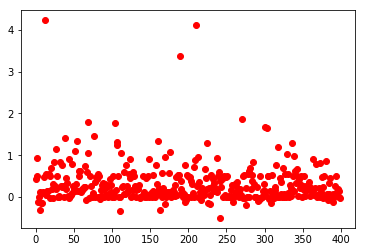

In [237]:
estimation_closed = estimation_closed[400:800]
plt.plot(estimation_closed, 'ro')
plt.show()

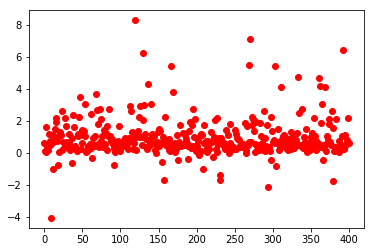

In [238]:
y_validation = y_validation[400:800]
plt.plot( y_validation, 'ro')
plt.show()

In [185]:
# Gradient descent
